In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
# Load the dataset (update the file path as needed)
dd=pd.read_csv("Data_cleaning_on_online _retailer.csv")
dd.count()
dd.info()
dd.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397758 entries, 0 to 397757
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397758 non-null  int64  
 1   StockCode    397758 non-null  object 
 2   Description  397758 non-null  object 
 3   Quantity     397758 non-null  int64  
 4   InvoiceDate  397758 non-null  object 
 5   UnitPrice    397758 non-null  float64
 6   CustomerID   397758 non-null  float64
 7   Country      397758 non-null  object 
 8   TotalSales   397758 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 27.3+ MB


,InvoiceNo,Quantity,UnitPrice,CustomerID,TotalSales
count,397758.000000,397758.000000,397758.000000,397758.000000,397758.000000
mean,560617.996877,12.172572,2.989840,15294.418026,21.268537
std,13105.778190,31.788318,6.995346,1713.107323,87.349641
min,536365.000000,1.000000,0.001000,12347.000000,0.001000
25%,549234.250000,2.000000,1.250000,13969.000000,4.680000
50%,561893.000000,6.000000,1.950000,15159.000000,11.800000
75%,572090.000000,12.000000,3.750000,16795.000000,19.800000
max,581587.000000,1000.000000,908.160000,18287.000000,38970.000000


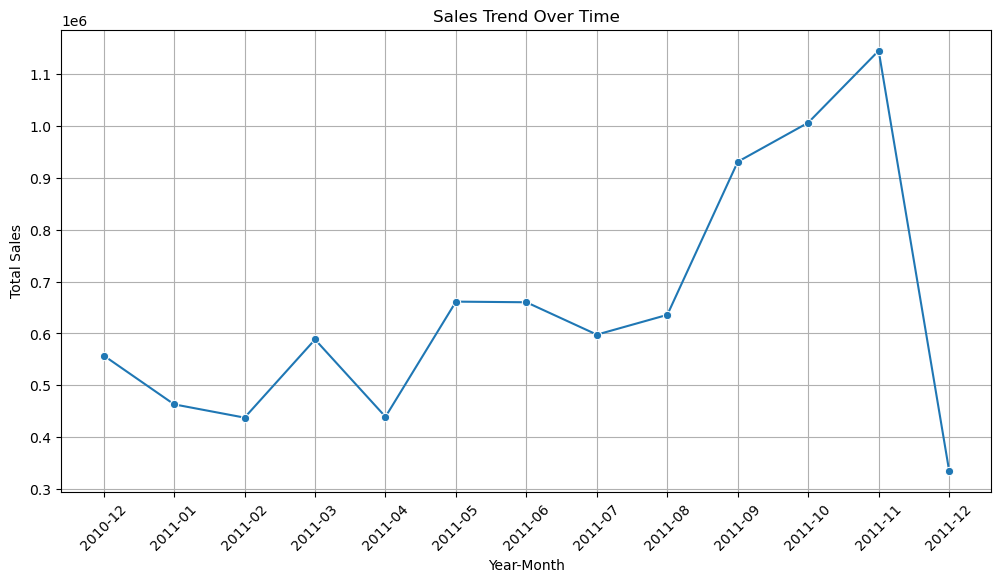

In [13]:

# Ensure InvoiceDate is a datetime type
dd["InvoiceDate"] = pd.to_datetime(dd["InvoiceDate"], errors="coerce")

# Extract Year-Month for time-based analysis
dd["YearMonth"] = dd["InvoiceDate"].dt.to_period("M")

# Group by YearMonth and calculate total sales
sales_trend = dd.groupby("YearMonth")["TotalSales"].sum()

# Plot the sales trend
plt.figure(figsize=(12,6))
sns.lineplot(x=sales_trend.index.astype(str), y=sales_trend.values, marker="o", linestyle="-")
plt.xticks(rotation=45)
plt.title("Sales Trend Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


C:\Users\jayan\AppData\Local\Temp\ipykernel_8576\1035779266.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="Blues_r")


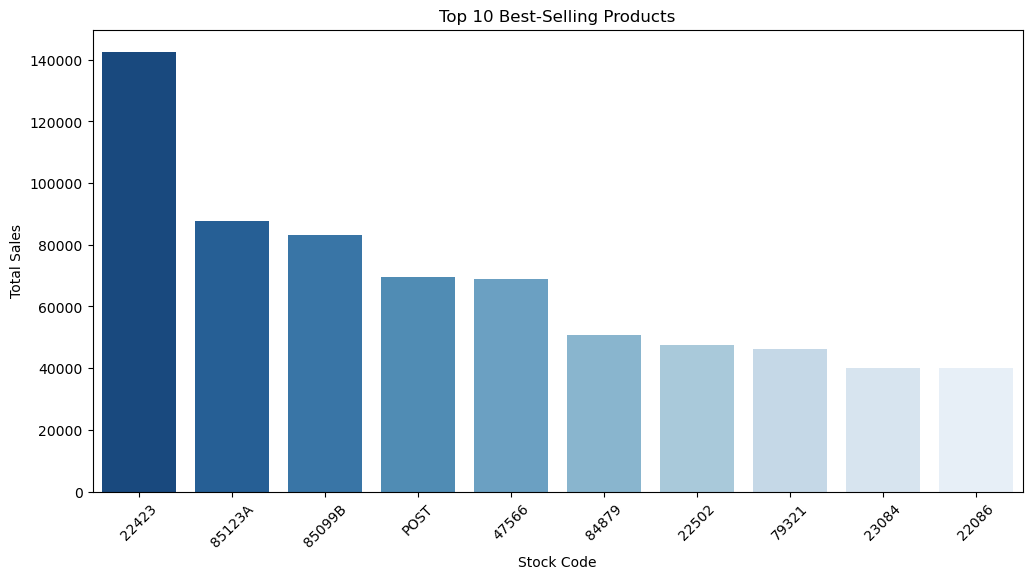

In [15]:
# Group by StockCode and get total sales
top_products = dd.groupby("StockCode")["TotalSales"].sum().nlargest(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.index, y=top_products.values, palette="Blues_r")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Stock Code")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


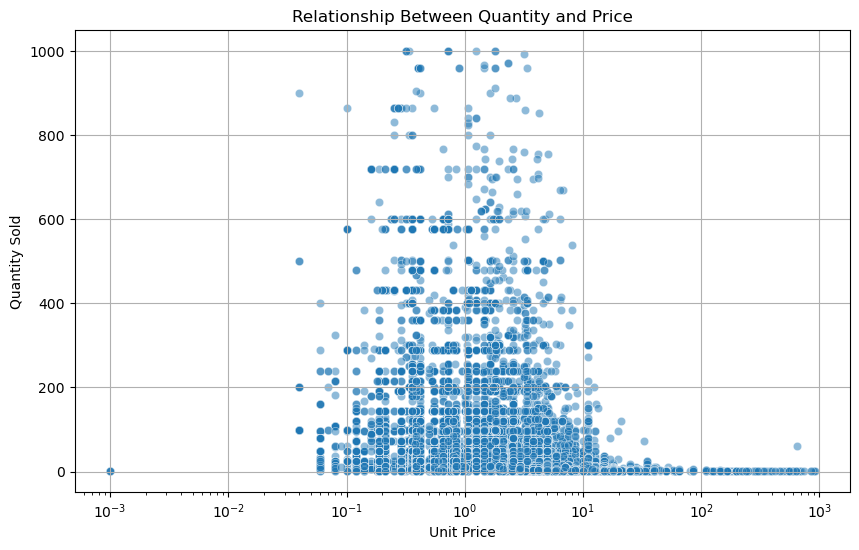

In [17]:
#we visualize the relationship between Quantity and Price
plt.figure(figsize=(10,6))
sns.scatterplot(x=dd["UnitPrice"], y=dd["Quantity"], alpha=0.5)
plt.xscale("log")  # Log scale for better visualization
plt.title("Relationship Between Quantity and Price")
plt.xlabel("Unit Price")
plt.ylabel("Quantity Sold")
plt.grid(True)
plt.show()


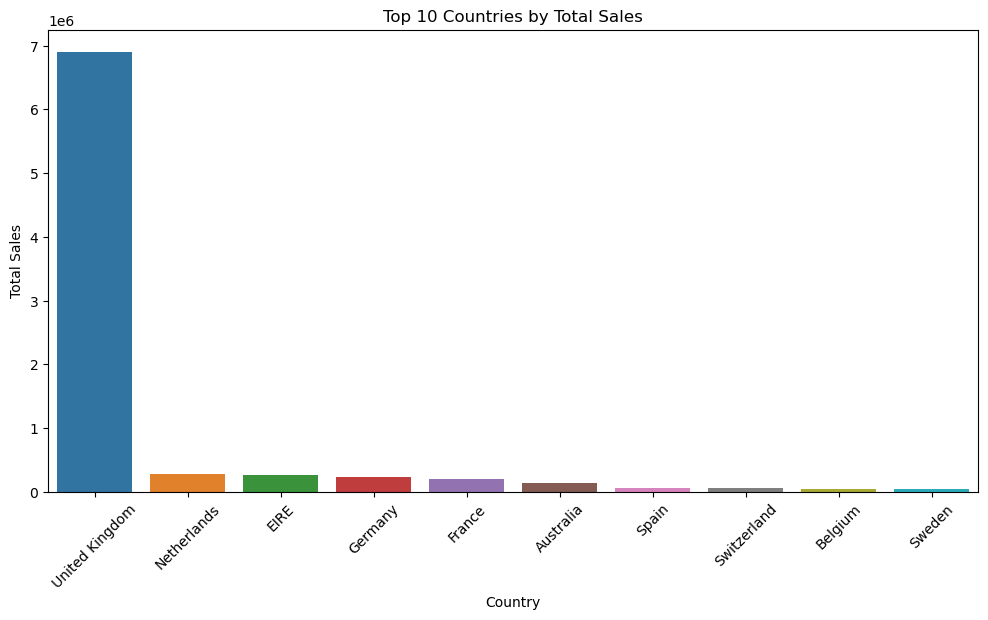

In [23]:
# Aggregate total sales per country
sales_by_country = dd.groupby("Country")["TotalSales"].sum().sort_values(ascending=False)


plt.figure(figsize=(12,6))
sns.barplot(x=sales_by_country.index[:10], y=sales_by_country.values[:10], hue=sales_by_country.index[:10], legend=False)
plt.title("Top 10 Countries by Total Sales")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.show()



C:\Users\jayan\AppData\Local\Temp\ipykernel_8576\2602044040.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_band_sales = dd.groupby("PriceBand")["TotalSales"].sum()


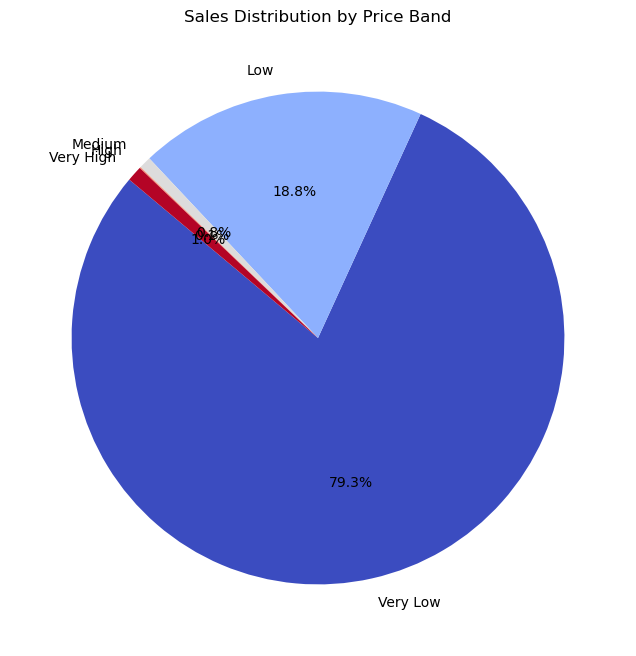

In [26]:
# Categorize products into price bands
price_bins = [0, 5, 20, 50, 100, dd["UnitPrice"].max()]
price_labels = ["Very Low", "Low", "Medium", "High", "Very High"]
dd["PriceBand"] = pd.cut(dd["UnitPrice"], bins=price_bins, labels=price_labels)

# Aggregate sales by price band
price_band_sales = dd.groupby("PriceBand")["TotalSales"].sum()

# Pie chart
plt.figure(figsize=(8,8))
price_band_sales.plot.pie(autopct="%1.1f%%", cmap="coolwarm", startangle=140)
plt.title("Sales Distribution by Price Band")
plt.ylabel("")
plt.show()
